In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
EPSILON = 1e-4
X, y = datasets.load_diabetes(return_X_y=True)


In [4]:
rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]
X /= np.sqrt(np.sum(X ** 2, axis=0))

Computing regularization path using the coordinate descend lasso
Computing reguularization path using the Lars lasso


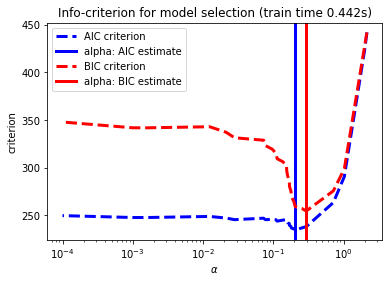

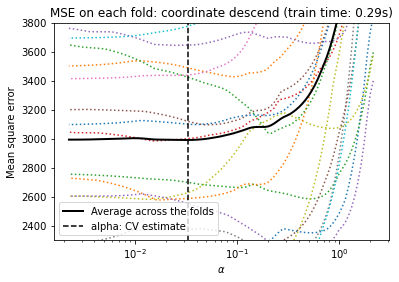

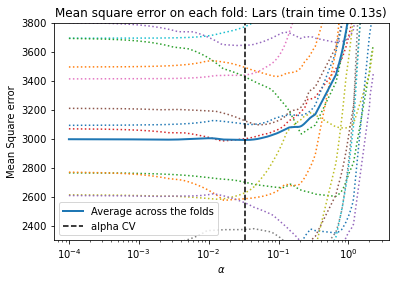

In [7]:
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(model.alphas_ + EPSILON, criterion_, '--', color=color,
                linewidth=3, label='%s criterion' % name)
    plt.axvline(model.alpha_ + EPSILON, color=color, linewidth=3,
               label='alpha: %s estimate' % name)
    plt.xlabel(r'$\alpha$')
    plt.ylabel('criterion')
    
plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Info-criterion for model selection (train time %.3fs)' % t_bic)

print('Computing regularization path using the coordinate descend lasso')
t1 = time.time()
model = LassoCV(cv=20).fit(X,y)
t_lasso_cv = time.time() - t1

plt.figure()
ymin, ymax = 2300, 3800
plt.semilogx(model.alphas_ +EPSILON, model.mse_path_, ':')
plt.plot(model.alphas_ + EPSILON, model.mse_path_.mean(axis=1), 'k',
        label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_ + EPSILON, linestyle='--', color='k',
           label='alpha: CV estimate')
plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('MSE on each fold: coordinate descend (train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

print('Computing reguularization path using the Lars lasso')
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X,y)
t_lasso_lars_cv = time.time() - t1

plt.figure()
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_.mean(axis=-1),
            label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_, linestyle='--', color='k',
           label='alpha CV')
plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Square error')
plt.title('Mean square error on each fold: Lars (train time %.2fs)' % t_lasso_lars_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.show()